<a href="https://colab.research.google.com/github/rlascocz/combinatory_optimization/blob/main/genetic_algorithm_calendar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

# genoma


In [3]:
def rest(inicio,final,nulo=-100,rest_menor=4,rest_mayor=8):
  verificador =False
  verificador_lista =False
  lista=[]
  #valores_validos=4
  while verificador == False and verificador_lista==False:

  #funcin que se encarga de agregar descansos,  teniendo encuenta el numero de unidades requeridas entre descansos
    lista=[nulo,nulo,nulo]
  #primer descanso
    lista[0]=random.randrange(inicio+rest_menor,inicio+rest_mayor)
    #print(f'{inicio+rest_menor}-{inicio+rest_mayor}')
  #segundo descanso
    lista[1]=random.randrange(lista[0]+rest_menor,lista[0]+rest_mayor)
  #tercer descanso
    lista[2]=random.randrange(lista[1]+rest_menor,lista[1]+rest_mayor)

  #validar valores de descanso no sobrepasen los limites
    lista_analizar =[inicio]
    lista_analizar +=[x for x in lista if x <= final-rest_menor-1]
    lista_analizar +=[final]
    #print(f'lista analizar ={lista_analizar}' )
    #if lista_analizar[1]-lista_analizar[0]<= rest_menor and lista_analizar[-1]-lista_analizar[-2]<= rest_menor:
     # verificador_lista =True
    if final-inicio>rest_mayor and len(lista_analizar)>2:
      verificador_lista =True

    lista_verificadora=[]
    for i in range(1,len(lista_analizar)):
      lista_verificadora+=[lista_analizar[i]-lista_analizar[i-1]]
    #lista_verificadora=[lista[0]-inicio,lista[1]-lista[0],lista[2]-lista[1],final-lista[2]]
    #print(f'{inicio},{lista},{final}')
    #print(f'lista verificadora ={lista_verificadora}')
    contador=len(lista_verificadora)
    #print(contador)
    lista_verificadora2=[x for x in lista_verificadora if (x >= rest_menor and x <= rest_mayor )]
    #print(f'lista verificadora2 ={lista_verificadora2}')
    #for  elemento in lista_verificadora:
    # if (elemento>=rest_menor and elemento<=rest_mayor):
    #   contador+=1
    #   print(contador)
    if contador==len(lista_verificadora2):
      verificador=True
    lista = sorted([x if (x <= final-rest_menor or x== nulo) else nulo for x in lista])
  return lista


def geneardor_gen(inicio=list(range(0,9)),unidades=37,lunch =list(range(16,25)),almuerzo=True,nulo=-100):
  #creacion del gen [inicio,tiempo_laboral,inicio_almuerzo,descanso1,descanso2,descanso3,descanso4,descanso5,descanso6]
  long_almuerzo=6
  lista=[]
  lista.append(random.choice(inicio))
  lista.append(unidades)
  if almuerzo==True:
    lista.append(random.choice(lunch))
    descanso=rest(lista[0],lista[2],nulo=nulo)
    descanso+=rest(lista[2]+long_almuerzo,lista[0]+lista[1],nulo=nulo)
    lista+=sorted(descanso)
  else:
    lista.append(nulo)
    descanso=rest(lista[0],lista[0]+lista[1],nulo=nulo)
    descanso+=[nulo,nulo,nulo]
    lista+=sorted(descanso)
  return lista

# cromosoma

[0, 37, 19, -10, -10, -10, 7, 14, 30]
[9, 37, 20, -10, -10, 15, 31, 36, 41]
[7, 37, 20, -10, -10, 11, 15, 31, 38]
[4, 37, 24, -10, -10, -10, 10, 15, 35]
[0, 37, 18, -10, -10, -10, 5, 10, 30]
[1, 37, 18, -10, -10, -10, 5, 11, 29]
[4, 37, 18, -10, -10, -10, 9, 30, 37]
[1, 37, 17, -10, -10, -10, 7, 12, 30]


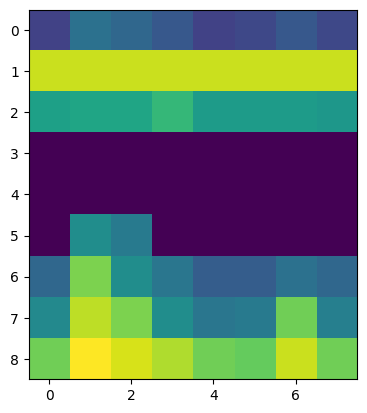

In [4]:
normal=list(range(0,9))
empleados=[[0],[9],normal,normal,normal,normal,normal,normal]
horario=[]
for i in empleados:
  horario.append(geneardor_gen (inicio=i,unidades=37,almuerzo=True,nulo=-10))
for i in horario:
  print(i)

plt.imshow(np.asarray(horario).T)

In [7]:
dir(np.array)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

In [28]:
np.asarray(horario)

array([[ 0, 37, 17, -1, -1, -1,  6, 13, 30],
       [ 9, 37, 23, -1, -1, 15, 19, 33, 37],
       [ 7, 37, 20, -1, -1, -1, 13, 30, 37],
       [ 8, 37, 18, -1, -1, 12, 29, 35, 40],
       [ 3, 37, 19, -1, -1, -1,  7, 13, 32],
       [ 5, 37, 17, -1, -1, -1, 10, 28, 34],
       [ 8, 37, 22, -1, -1, -1, 14, 34, 40],
       [ 2, 37, 22, -1, -1, -1,  8, 15, 32]])

In [20]:
print(geneardor_gen (iniunidades=37,almuerzo=True,nulo=1000) )

[4, 37, 19, 10, 14, 30, 37, 1000, 1000]


# population

# fitness evaluation

#selection

# crossover

# mutation

#generation replacement (offspring)

# repetition

# termination